<a href="https://colab.research.google.com/github/FuadHamdiBahar/Deep-Learning-Machine-Learning-Tasks/blob/main/Classification_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import all the library that we need. Pandas to read csv file, tensorflow to create Neural Network Model, LabelEncoder to One-Hot encoding label and train_test_split to split data to train and test.

In [1]:
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Iris.csv").drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Get all independent variable and convert it into numpy array. Also, convert dependent variable into numpy array

In [3]:
X = df.iloc[:, :-1].values
y = df.Species.values

Encode label from text label (Setosa, Versicolor and Virginica) to numerical label (0, 1, 2) then dummies it. 

In [4]:
encoder =  LabelEncoder()
y = encoder.fit_transform(y)
y = pd.get_dummies(y).values

Split data to train and test purpose

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Here i am using function base model, because it is easier. Input shape is (4,) because there are 4 independent variables. Then, the output layers has 3 Dense because there are 3 classes. We use softmax activation to give probability to all classes.

In [6]:
# function base Model
inp = tf.keras.Input(shape=(4,))
x = tf.keras.layers.Dense(10, activation='relu') (inp)
x = tf.keras.layers.Dense(10, activation='relu') (x)
out = tf.keras.layers.Dense(3, activation='softmax') (x)

model = tf.keras.Model(inputs=inp, outputs=out)

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Summarize the model to see model parameters

In [7]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 10)                50        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


Fit the model with train data

In [8]:
h = model.fit(X_train, y_train, batch_size=50, epochs=100, verbose=0)

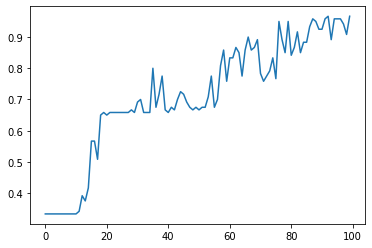

In [9]:
import matplotlib.pyplot as plt

plt.plot(h.history['accuracy'])

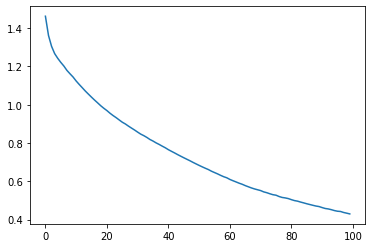

In [10]:
plt.plot(h.history['loss'])

In [11]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.4176827371120453
Test accuracy: 0.9333333373069763


Predict test data for evaluating purpose

In [12]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 77ms/step


Since we use softmax as activation function, we have to get the higher probability of every prediction of data. We use np.argmax() to do it. For example, the probability given is (0.50, 0.30, 0.20) so the function will return 0, because 0 class has the biggest probability

In [13]:
import numpy as np

actual = np.argmax(y_test,axis=1)
predicted = np.argmax(y_pred,axis=1)

print(f"Actual: {actual}")
print(f"Predicted: {predicted}")

Actual: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Predicted: [1 0 2 1 2 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


Classification report to see model performance. Precision, recall and f1-score is the common tools to measure the performance

In [14]:
from sklearn.metrics import classification_report

print(classification_report(actual, predicted, target_names = df.Species.unique()))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.78      0.88         9
 Iris-virginica       0.85      1.00      0.92        11

       accuracy                           0.93        30
      macro avg       0.95      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30

